# Distribución Binomial

In [18]:
import math
import pandas as pd
import numpy as np  # generación aleatoria de numeros
from scipy.stats import binom
import matplotlib.pyplot as plt # generación de gráficos

### Generación de muestras
Generamos 1000 muestras de una distribució binomial con 10 ensayos y una probabilidad de éxito de 0,5 en cada ensayo

In [19]:
# Generación de muestras con distribución binomial
# Parámetros:
n = 10    # Número de ensayos
p = 0.5   # Probabilidad de éxito en cada ensayo
size = 1000  # Número de simulaciones
# cada muestra (size = 1000) es un experimento de (n=10) ensayos
# cada ensayo tiene una probabilidad d 0.5 de éxito

# Simulación
binomial_samples = np.random.binomial(n, p, size)

# Crear el DataFrame inicial con las muestras
df = pd.DataFrame(binomial_samples, columns=['Samples'])
df

,Samples
0,7
1,7
2,3
3,4
4,6
...,...
995,5
996,4
997,5
998,5


In [20]:
# Calcular la frecuencia de cada valor (cada valor está entre 0 y 10)
frequency = df.Samples.value_counts().sort_index()

In [21]:
# Calcular las probabilidades teóricas ()
probabilities = [binom.pmf(k, n, p) for k in range(n + 1)]

In [22]:
# Crear el DataFrame final con las muestras, la frecuencia y la probabilidad
# Puede observarse como las probabilidades teóricas se asemejan a la distribución d frecuencia relativa
# También se ve que la frequencia aobsoluta tiene la misma forma que las distribuciones relativas y de probabilidad
df_SampProb = pd.DataFrame({
    'Sample': frequency.index,
    'Frequency': frequency.values,
    'RelativeFrequency': frequency.values / size,
    'Probability': probabilities[:len(frequency)],
    'x*f' : frequency.index * frequency.values,
    'x*rf': frequency.index * frequency.values / size,
    'x*p' : frequency.index * probabilities[:len(frequency)]
})
df_SampProb

,Sample,Frequency,RelativeFrequency,Probability,x*f,x*rf,x*p
0,0,1,0.001,0.000977,0,0.000,0.000000
1,1,8,0.008,0.009766,8,0.008,0.009766
2,2,41,0.041,0.043945,82,0.082,0.087891
3,3,114,0.114,0.117187,342,0.342,0.351562
4,4,209,0.209,0.205078,836,0.836,0.820312
5,5,253,0.253,0.246094,1265,1.265,1.230469
6,6,201,0.201,0.205078,1206,1.206,1.230469
7,7,112,0.112,0.117187,784,0.784,0.820312
8,8,49,0.049,0.043945,392,0.392,0.351563
9,9,12,0.012,0.009766,108,0.108,0.087891


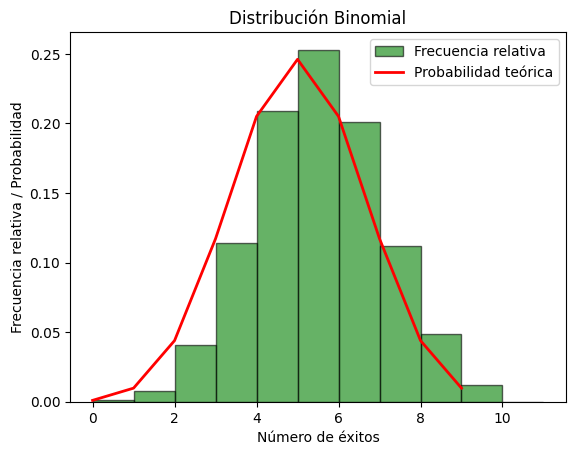

In [23]:
# Visualización (opcional)
plt.hist(binomial_samples, bins=range(n + 2), edgecolor='black', density=True, alpha=0.6, color='g', label='Frecuencia relativa')
plt.plot(df_SampProb['Sample'], df_SampProb['Probability'], 'r-', lw=2, label='Probabilidad teórica')
plt.title('Distribución Binomial')
plt.xlabel('Número de éxitos')
plt.ylabel('Frecuencia relativa / Probabilidad')
plt.legend()
plt.show()

In [24]:
df_SampProb.describe()

,Sample,Frequency,RelativeFrequency,Probability,x*f,x*rf,x*p
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.50000,100.000000,0.100000,0.099902,502.300000,0.502300,0.499023
std,3.02765,93.048375,0.093048,0.092130,486.967955,0.486968,0.488356
min,0.00000,1.000000,0.001000,0.000977,0.000000,0.000000,0.000000
25%,2.25000,19.250000,0.019250,0.018311,88.500000,0.088500,0.087891
50%,4.50000,80.500000,0.080500,0.080566,367.000000,0.367000,0.351563
75%,6.75000,179.250000,0.179250,0.183105,823.000000,0.823000,0.820312
max,9.00000,253.000000,0.253000,0.246094,1265.000000,1.265000,1.230469


In [25]:
df_SampProb

,Sample,Frequency,RelativeFrequency,Probability,x*f,x*rf,x*p
0,0,1,0.001,0.000977,0,0.000,0.000000
1,1,8,0.008,0.009766,8,0.008,0.009766
2,2,41,0.041,0.043945,82,0.082,0.087891
3,3,114,0.114,0.117187,342,0.342,0.351562
4,4,209,0.209,0.205078,836,0.836,0.820312
5,5,253,0.253,0.246094,1265,1.265,1.230469
6,6,201,0.201,0.205078,1206,1.206,1.230469
7,7,112,0.112,0.117187,784,0.784,0.820312
8,8,49,0.049,0.043945,392,0.392,0.351563
9,9,12,0.012,0.009766,108,0.108,0.087891


#### Suma de las frecuencias relativas y probabilidades
Tanto las frecuencias relativas (estimaciones de campo de probabilidades) como las probabilidades teoricas deben sumar 1.

In [26]:
df_SampProb.RelativeFrequency.sum(), df_SampProb.Probability.sum()

(1.0, 0.9990234374999998)

#### Media de la distribución de frecuencias
La media se puede calcular de dos formas:
- como la suma producto se x por f, dividido la cantidad total de experimentos.
- como la suma dde las frecuencias relativas ya calculadas

In [27]:
# Calcular la media de la distribución de frecuencias de las dos formas
# Es una media ponderada de las x por el peso de la fecuencia
df_SampProb['x*f'].sum()/size, df_SampProb['x*rf'].sum()

(5.023, 5.023000000000001)

#### Calculo de la varianza de la distribución de frecuencias binomial
##### Opción 1

In [28]:
# primero calculamos las diferencia entre x y la media de la distribución de frecuencias
df_SampProb.Sample - df_SampProb['x*rf'].sum()

0   -5.023
1   -4.023
2   -3.023
3   -2.023
4   -1.023
5   -0.023
6    0.977
7    1.977
8    2.977
9    3.977
Name: Sample, dtype: float64

In [29]:
# segundo elevemos estas diferencias
(df_SampProb.Sample - df_SampProb['x*rf'].sum()) **2

0    25.230529
1    16.184529
2     9.138529
3     4.092529
4     1.046529
5     0.000529
6     0.954529
7     3.908529
8     8.862529
9    15.816529
Name: Sample, dtype: float64

In [30]:
# tercero multiplicamos el cuadrado de las diferencias por la frecuencia relativa
((df_SampProb.Sample - df_SampProb['x*rf'].sum()) **2) * df_SampProb.RelativeFrequency

0    0.025231
1    0.129476
2    0.374680
3    0.466548
4    0.218725
5    0.000134
6    0.191860
7    0.437755
8    0.434264
9    0.189798
dtype: float64

In [31]:
# cuarto realizar la sumatoria
(((df_SampProb.Sample - df_SampProb['x*rf'].sum()) **2) * df_SampProb.RelativeFrequency).sum()

2.468471

#### Calculo de la varianza de la distribución de frecuencias binomial
##### Opción 2

In [32]:
# Primero. Calculo del cuadrado de cada observación n por su frecuencia relativa
df_SampProb.Sample ** 2 * df_SampProb.RelativeFrequency

0    0.000
1    0.008
2    0.164
3    1.026
4    3.344
5    6.325
6    7.236
7    5.488
8    3.136
9    0.972
dtype: float64

In [33]:
# Segundo. Calculo de la sumatoria del producto anterior
(df_SampProb.Sample ** 2 * df_SampProb.RelativeFrequency).sum()

27.699

In [34]:
# Tercero. Calculo de la diferencia de la sumatoria anterior con el cuadrado de la media
(df_SampProb.Sample ** 2 * df_SampProb.RelativeFrequency).sum() - df_SampProb['x*rf'].sum() ** 2

2.4684709999999974

#### Desviación Estandard
Se trata de la raiz cuadrada que se calcula por cualquiera de las dos opciones anteriores

In [35]:
math.sqrt((((df_SampProb.Sample - df_SampProb['x*rf'].sum()) **2) * df_SampProb.RelativeFrequency).sum()), math.sqrt((df_SampProb.Sample ** 2 * df_SampProb.RelativeFrequency).sum() - df_SampProb['x*rf'].sum() ** 2)

(1.5711368495455766, 1.5711368495455758)

#### Indicadores de spycy

In [36]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [37]:
mean, var, skew, kurt

(5.0, 2.5, 0.0, -0.2)